原创教程，版权所有。

同济子豪兄B站视频专栏：https://space.bilibili.com/1900783

玩转UCI心脏病二分类数据集，课件、代码、答疑互动：https://t.zsxq.com/Z7yNZBu

子豪兄Python交流QQ群：1077638784

子豪兄Kaggle数据科学竞赛交流：481041896

微信公众号：人工智能小技巧

2020-05-15


# 本节概述

使用shap机器学习可解释性分析工具包，对uci心脏病数据集上训练得到的随机森林分类模型进行可解释性分析。

得到特征重要性图、shap值图、单个样本所有特征的shap值图、某一特征不同值的shap值图。

赋予机器学习模型可解释性，打破机器学习模型的黑箱子，让我们能更加充分了解模型、改进模型、信任模型，并对每一个数据样本构建精准定制的数学模型。

# 构建数据集、训练模型、对测试集样本预测

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

# 导入数据集，划分特征和标签
df = pd.read_csv('process_heart.csv')
X = df.drop('target',axis=1)
y = df['target']

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 构建随机森林模型
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

# 计算shap值

In [2]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 特征重要度

对于某个特征，计算测试集每个病人的该特征shap值之和，shap值越高，特征越重要。

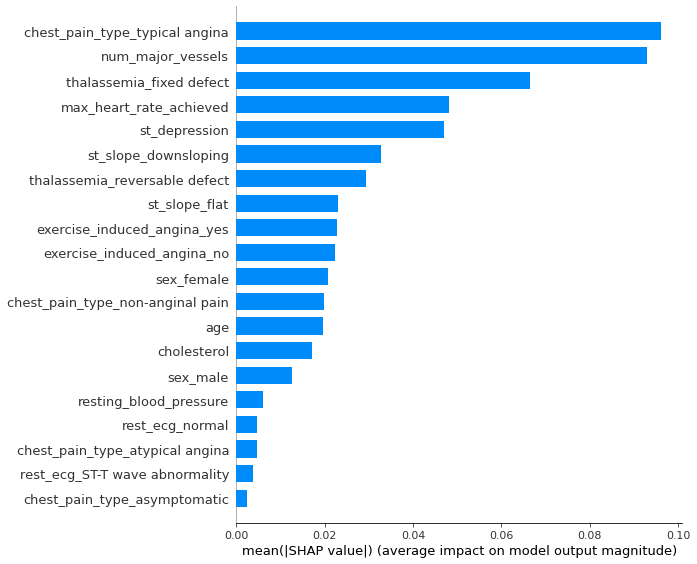

In [3]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# 各特征的数值大小 与 各特征的shap值 关系图

每一行表示一个特征，红色表示该特征的值较高的数据点，蓝色值表示该特征的值较低的数据点。

越靠右的点表示这个特征对预测为“患病”的正向影响越高。

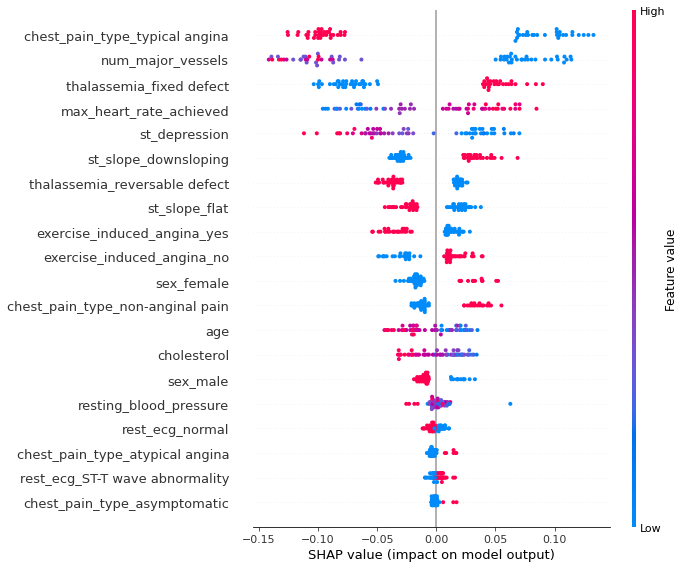

In [4]:
shap.summary_plot(shap_values[1], X_test)

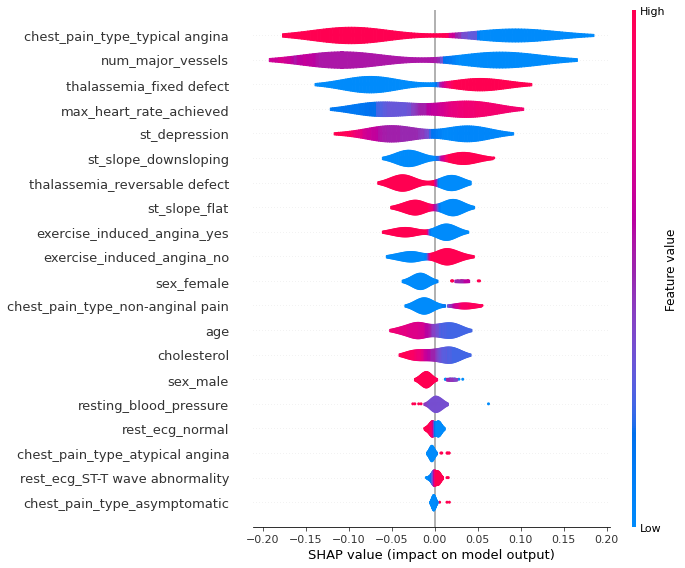

In [5]:
shap.summary_plot(shap_values[1], X_test, plot_type="violin")

num_major_vessels越大，对预测为“患病”结果的正向贡献越小。

max_heart_rate_achieved越大，对预测为“患病”结果的正向贡献越大。

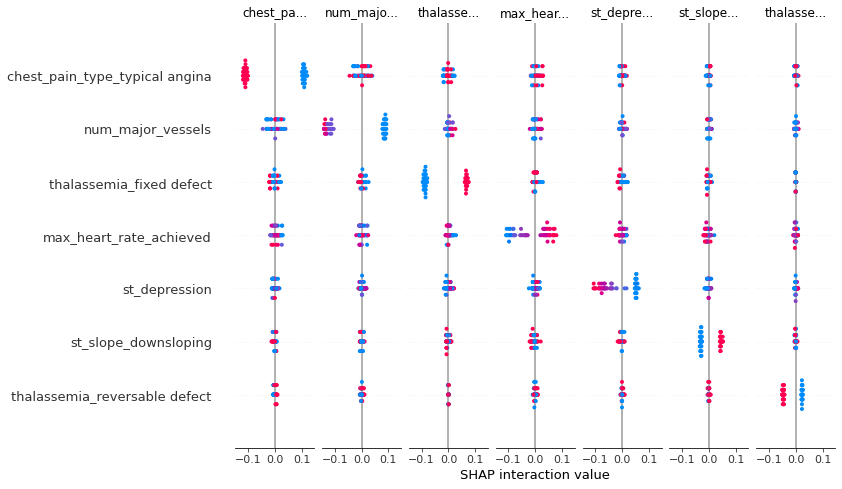

In [6]:
shap_interaction_values = explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values[1],X_test)

# 分析单个样本各特征对预测为“患病”结果的影响

In [7]:
X_test.head(10)

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
246   56                     134          409                      150   
183   58                     112          230                      165   
229   64                     125          309                      131   
126   47                     112          204                      143   
184   50                     150          243                      128   
1     37                     130          250                      187   
59    57                     128          303                      159   
194   60                     140          185                      155   
132   42                     120          295                      162   
175   40                     110          167                      114   

     st_depression  num_major_vessels  sex_female  sex_male  \
246            1.9                  2           1         0   
183            2.5                  1           0         1   
229            1.8                  0           0         1   
126            0.1                  0           0         1   
184            2.6                  0           0         1   
1              3.5                  0           0         1   
59             0.0                  1           1         0   
194            3.0                  0           0         1   
132            0.0                  0           0         1   
175            2.0                  0           0         1   

     chest_pain_type_asymptomatic  chest_pain_type_atypical angina  ...  \
246                             0                                0  ...   
183                             0                                0  ...   
229                             0                                0  ...   
126                             0                                0  ...   
184                             0                                0  ...   
1                               0                                0  ...   
59                              0                                0  ...   
194                             0                                0  ...   
132                             0                                1  ...   
175                             0                                0  ...   

     rest_ecg_normal  exercise_induced_angina_no  exercise_induced_angina_yes  \
246                1                           0                            1   
183                1                           1                            0   
229                0                           0                            1   
126                0                           1                            0   
184                1                           1                            0   
1                  0                           1                            0   
59                 1                           1                            0   
194                1                           1                            0   
132                0                           1                            0   
175                1                           0                            1   

     st_slope_downsloping  st_slope_flat  st_slope_upsloping  \
246                     0              1                   0   
183                     0              1                   0   
229                     0              1                   0   
126                     1              0                   0   
184                     0              1                   0   
1                       0              0                   1   
59                      1              0                   0   
194                     0              1                   0   
132                     1              0                   0   
175                     0              1                   0   

     thalassemia_fixed defect  thalassemia_normal  \
246                 

In [8]:
# 选取测试集中索引号为126的病人
idx = 126
patient = X.iloc[idx,:]

In [9]:
patient

age                                           47.0
resting_blood_pressure                       112.0
cholesterol                                  204.0
max_heart_rate_achieved                      143.0
st_depression                                  0.1
num_major_vessels                              0.0
sex_female                                     0.0
sex_male                                       1.0
chest_pain_type_asymptomatic                   0.0
chest_pain_type_atypical angina                0.0
chest_pain_type_non-anginal pain               0.0
chest_pain_type_typical angina                 1.0
fasting_blood_sugar_greater than 120mg/ml      0.0
fasting_blood_sugar_lower than 120mg/ml        1.0
rest_ecg_ST-T wave abnormality                 1.0
rest_ecg_left ventricular hypertrophy          0.0
rest_ecg_normal                                0.0
exercise_induced_angina_no                     1.0
exercise_induced_angina_yes                    0.0
st_slope_downsloping           

126号病人在原始数据集X中的索引为126，在测试集是第4个样本，索引为3。

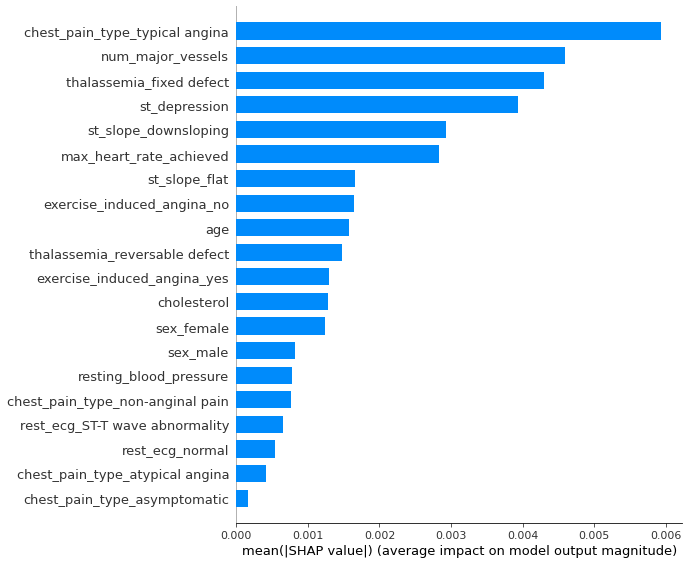

In [10]:
shap.summary_plot(shap_interaction_values[1][3], X_test, plot_type="bar")

In [11]:
# 计算该病人的各特征对“不患心脏病”和“患心脏病”两个预测结果的shap值
shap_values_patient = explainer.shap_values(patient)

In [12]:
shap_values_patient

[array([-1.73020637e-02,  7.34084181e-03, -2.78245598e-02,  1.88194860e-02,
        -4.87254831e-02, -1.01985773e-01,  2.35203557e-02,  1.61387649e-02,
        -4.16312420e-04,  6.80458829e-03,  9.72113079e-03,  8.09169775e-02,
         2.06988808e-04,  2.89756730e-04, -5.58350449e-03, -4.58454236e-05,
        -5.74275416e-03, -3.01100695e-02, -1.74174494e-02, -3.73355263e-02,
        -1.05293597e-02, -2.61558515e-04, -5.16786504e-02, -1.33345330e-03,
        -2.23737396e-02, -4.45806900e-04]),
 array([ 1.73020637e-02, -7.34084181e-03,  2.78245598e-02, -1.88194860e-02,
         4.87254831e-02,  1.01985773e-01, -2.35203557e-02, -1.61387649e-02,
         4.16312420e-04, -6.80458829e-03, -9.72113079e-03, -8.09169775e-02,
        -2.06988808e-04, -2.89756730e-04,  5.58350449e-03,  4.58454236e-05,
         5.74275416e-03,  3.01100695e-02,  1.74174494e-02,  3.73355263e-02,
         1.05293597e-02,  2.61558515e-04,  5.16786504e-02,  1.33345330e-03,
         2.23737396e-02,  4.45806900e-04])]

In [13]:
# 该病人各特征对“不患心脏病”预测结果的shap值
shap_values_patient[0]

array([-1.73020637e-02,  7.34084181e-03, -2.78245598e-02,  1.88194860e-02,
       -4.87254831e-02, -1.01985773e-01,  2.35203557e-02,  1.61387649e-02,
       -4.16312420e-04,  6.80458829e-03,  9.72113079e-03,  8.09169775e-02,
        2.06988808e-04,  2.89756730e-04, -5.58350449e-03, -4.58454236e-05,
       -5.74275416e-03, -3.01100695e-02, -1.74174494e-02, -3.73355263e-02,
       -1.05293597e-02, -2.61558515e-04, -5.16786504e-02, -1.33345330e-03,
       -2.23737396e-02, -4.45806900e-04])

In [14]:
# 该病人各特征对“患心脏病”预测结果的shap值
shap_values_patient[1]

array([ 1.73020637e-02, -7.34084181e-03,  2.78245598e-02, -1.88194860e-02,
        4.87254831e-02,  1.01985773e-01, -2.35203557e-02, -1.61387649e-02,
        4.16312420e-04, -6.80458829e-03, -9.72113079e-03, -8.09169775e-02,
       -2.06988808e-04, -2.89756730e-04,  5.58350449e-03,  4.58454236e-05,
        5.74275416e-03,  3.01100695e-02,  1.74174494e-02,  3.73355263e-02,
        1.05293597e-02,  2.61558515e-04,  5.16786504e-02,  1.33345330e-03,
        2.23737396e-02,  4.45806900e-04])

In [15]:
# 两组shap值互为相反数，和为0
shap_values_patient[0] + shap_values_patient[1]

array([-1.04083409e-17,  8.67361738e-19,  3.46944695e-18, -2.77555756e-17,
        6.93889390e-18,  2.77555756e-17, -6.93889390e-18, -2.08166817e-17,
        7.04731412e-19, -2.60208521e-18, -3.46944695e-18,  6.93889390e-17,
       -5.69206141e-19,  4.33680869e-19,  4.33680869e-18, -6.77626358e-21,
       -5.20417043e-18,  0.00000000e+00, -1.73472348e-17,  2.77555756e-17,
        5.20417043e-18, -2.71050543e-19,  2.77555756e-17,  8.67361738e-19,
        6.93889390e-18,  3.25260652e-19])

In [16]:
shap.force_plot(explainer.expected_value[1], shap_values_patient[1], patient)

force plot展示126号病人各特征对预测为“患病”的贡献。

红色表示正向贡献，蓝色表示负向贡献，越长表示shap越高，也就是影响越大。

红色条减去蓝色条，即为base value平均结果到最终预测结果之间的差距。

In [17]:
# 完整代码

# 选取完整数据集中索引为idx的样本
idx = 126

patient = X.iloc[idx,:]
patient_df = X.loc[idx:idx]
model_predict_proba = model.predict_proba(patient_df)[0][1]
print('{}号病人的真实标签是 {} ，模型预测为 {:.2f} '.format(idx, bool(y_test[idx]), model_predict_proba))

shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient[1], patient)

126号病人的真实标签是 True ，模型预测为 0.79 


瀑布图与上图类似，展示了某个病人从测试集平均结果到最终预测结果的决策过程，以及各特征对预测结果的贡献影响。

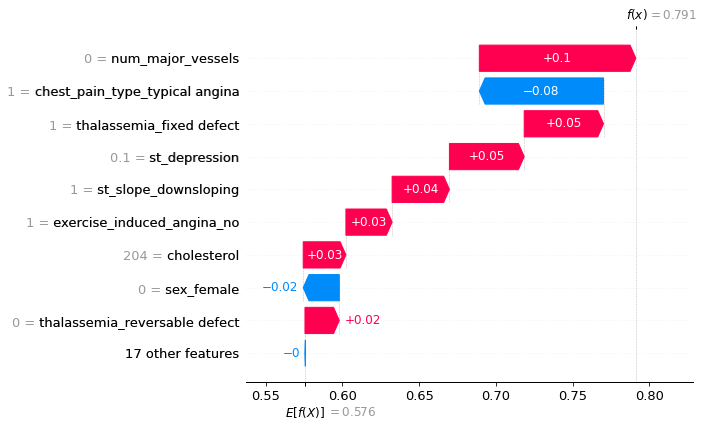

In [18]:
idx = 126
patient = X.loc[idx,:]
shap_values_patient = explainer.shap_values(patient)
shap.waterfall_plot(explainer.expected_value[1], shap_values_patient[1], patient)

In [19]:
# 完整代码

# 选取完整数据集中索引为idx的样本
idx = 175

patient = X.iloc[idx,:]
patient_df = X.loc[idx:idx]
model_predict_proba = model.predict_proba(patient_df)[0][1]
print('{}号病人的真实标签是 {} ，模型预测为 {:.2f} '.format(idx, bool(y_test[idx]), model_predict_proba))

shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient[1], patient)

175号病人的真实标签是 False ，模型预测为 0.09 


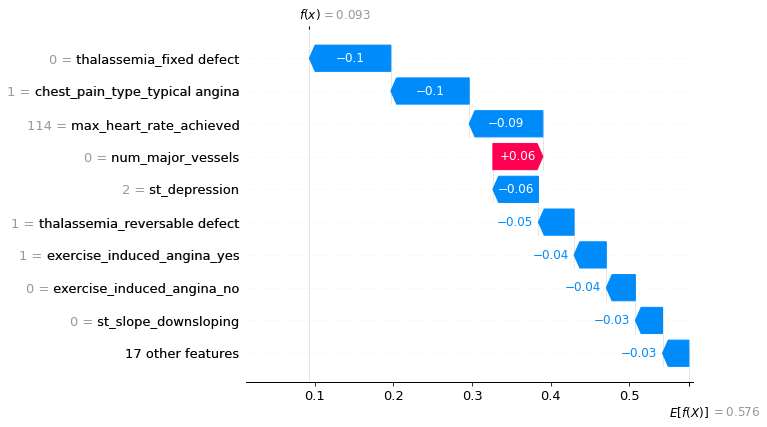

In [20]:
idx = 175
patient = X.loc[idx,:]
shap_values_patient = explainer.shap_values(patient)
shap.waterfall_plot(explainer.expected_value[1], shap_values_patient[1], patient)

# 测试集所有样本的summary plot

将测试集所有样本的force plot旋转九十度并拼接在一起，形成summary plot。

可以在下拉菜单选择按照相似性聚类展示、按照预测结果概率从大到小展示、按照测试集原本样本顺序、按照某个特征分别展示。

In [21]:
number_show = 60
shap_values_summary = explainer.shap_values(X_train.iloc[:number_show])
shap.force_plot(explainer.expected_value[1], shap_values_summary[1], X_test.iloc[:number_show])

# Dependence Plot

展示某个特征从小变大时对预测结果的shap值。

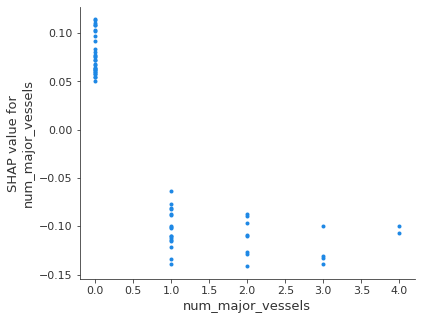

In [22]:
shap.dependence_plot("num_major_vessels", shap_values[1], X_test, interaction_index=None)

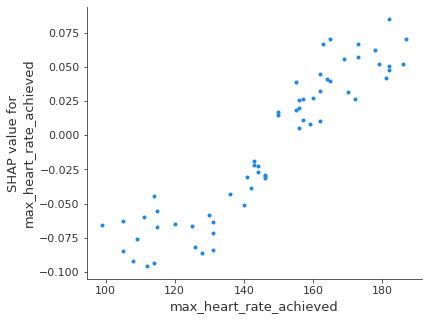

In [23]:
shap.dependence_plot("max_heart_rate_achieved", shap_values[1], X_test, interaction_index=None)

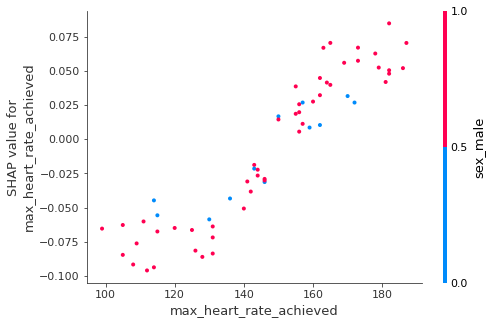

In [24]:
shap.dependence_plot('max_heart_rate_achieved', shap_values[1], X_test, interaction_index="sex_male")

# Partial Dependence Plot

展示某个特征从小变大时模型预测结果。

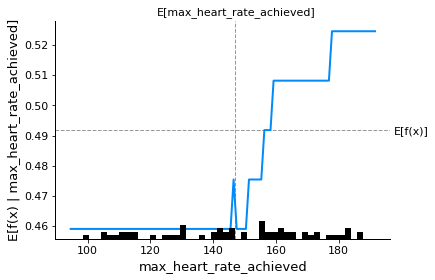

In [25]:
shap.partial_dependence_plot("max_heart_rate_achieved", model.predict, X_test, model_expected_value=True, feature_expected_value=True)

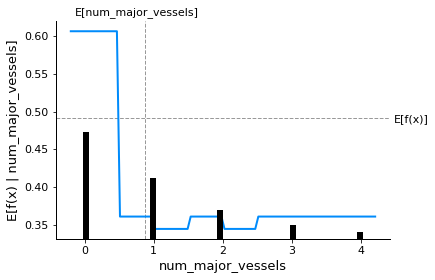

In [26]:
shap.partial_dependence_plot("num_major_vessels", model.predict, X_test, model_expected_value=True, feature_expected_value=True)